**tensorflow 분류에서 분류모델평가 부분에서 시작**

-> 그 전에 white와 red 나눌때 너무 정확도 잘 나와서 의심!
(p96부터)


In [1]:
import pandas as pd

red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')


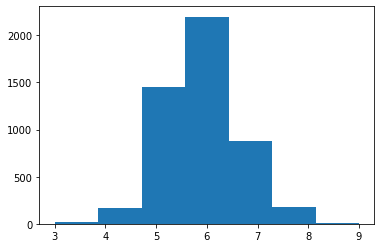

In [2]:
import matplotlib.pyplot as plt

plt.hist(white['quality'], bins=7)
plt.show()

In [3]:
red['type']=0
white['type']=1
wine=pd.concat([red,white])


In [4]:
wine.loc[wine['quality']<=5, 'new_quality']=0
wine.loc[wine['quality']==6, 'new_quality']=1
wine.loc[wine['quality']>=7, 'new_quality']=2

print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts())

count    6497.000000
mean        0.829614
std         0.731124
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: new_quality, dtype: float64
1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64


In [5]:
del wine['quality']
wine_norm=(wine - wine.min()) / (wine.max() - wine.min())
wine_shuffle = wine_norm.sample(frac=1) # 데이터를 섞기 위해서 사용(1은 100%)
wine_np = wine_shuffle.to_numpy() # array형식으로 바꾸기

In [6]:
import tensorflow as tf

train_idx=int(len(wine_np) * 0.8)

train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]

train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=3)
test_Y=tf.keras.utils.to_categorical(test_Y, num_classes=3)
# new quality가 3개 분류로 나뉘었으므로

In [7]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=48,activation='relu',input_shape=(12,)),
                             tf.keras.layers.Dense(units=24,activation='relu'),
                             tf.keras.layers.Dense(units=12,activation='relu'),
                             tf.keras.layers.Dense(units=3,activation='softmax')
])

#softmax는 분류 문제나 RNN에서의 다음 토큰 예측, 강화학습에서 에이전트의 행동 확률을 구하는 등 결과값으로 확률이 필요한 다양한 분야에 사용


In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.003),loss='categorical_crossentropy',metrics=['accuracy'])


In [9]:
#앤트로피: 확률의 역수에 로그를 취한 값 -> 불확실한 정보로 숫자로 정량화
# -> 확률의 역수를 취해주는 이유는 확률이 높은 사건일수록 정보량이 적다고 판단
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)
#model.evaluate(test_X, test_Y)

Epoch 1/25
122/122 [==============================] - 1s 5ms/step - loss: 0.6643 - accuracy: 0.7236 - val_loss: 0.4519 - val_accuracy: 0.7908
Epoch 2/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4180 - accuracy: 0.8139 - val_loss: 0.4262 - val_accuracy: 0.8138
Epoch 3/25
122/122 [==============================] - 0s 2ms/step - loss: 0.4074 - accuracy: 0.8134 - val_loss: 0.4417 - val_accuracy: 0.7985
Epoch 4/25
122/122 [==============================] - 0s 2ms/step - loss: 0.3972 - accuracy: 0.8160 - val_loss: 0.4100 - val_accuracy: 0.8138
Epoch 5/25
122/122 [==============================] - 0s 2ms/step - loss: 0.3905 - accuracy: 0.8252 - val_loss: 0.4083 - val_accuracy: 0.8108
Epoch 6/25
122/122 [==============================] - 0s 2ms/step - loss: 0.3775 - accuracy: 0.8313 - val_loss: 0.4040 - val_accuracy: 0.8123
Epoch 7/25
122/122 [==============================] - 0s 2ms/step - loss: 0.3885 - accuracy: 0.8294 - val_loss: 0.4034 - val_accuracy: 0.8108
Epoch 

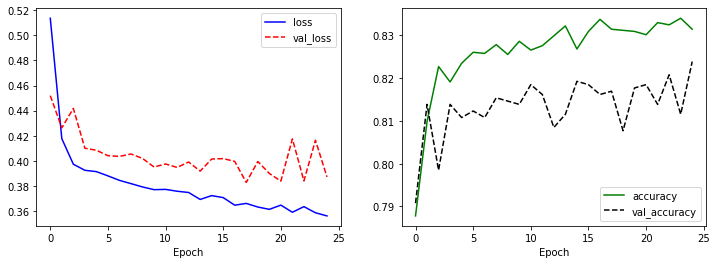

In [10]:
# 다항 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()